# Study of symmetric and asymmetric fission of Copernicium-284

## by Yuliia Hrabar

## Table of content 
* [Intructions on how to run the notebook](#run)
* [Abstract](#abstract)

* [Importing python packages](#import)

* [Reading simulation data from files](#read)
    * [Extracting information from root trees](#root)
    * [Storing extracted ROOT data as DataFrame into ASCII file](#ascii)
    * [Loading data from an ASCII file](#loading)

* [Asymmetric fission case](#asymmetric)
    * [Constructing  a histogram for implantation detector ](#histo_imp)
    * [Constructing  a histogram for box detectors ](#histo_box)
    * [Energy deposited in implantation vs box detectors](#imp_box)
        * [Events that were registered both at implantation detector and box detectors at the same time](#same)
        * [All events registered at the implantation detector and box detectors](#all_events)

* [Results of all simulations](#all_simulations)
    * [Plots of all simulations](#plots_all)
    * [Plot selected simulation](#plot_selected)


## Instructions on how to run the notebook <a name="run"></a>

* Active the environment.yml

`conda env create -f environment.yml`

`conda activate fission`

* Open jupyter notebook 

`jupyter notebook GEANT4_FissionFragments.ipynb`

* Run everything by clicking
`Kernel -> Restart & Run All`

## Abstract <a name="abstract"></a>

The purpose of this _jupyter notebook_ is to analyze the data produced from simulating spontaneous fission of an alpha decay product Copernicium-244 of Super Heavy Element (SHE) Flevorium-288 and [TASISpec detector setup](https://portal.research.lu.se/portal/files/3183833/4004479.pdf). 

[Recent study](https://epja.epj.org/articles/epja/abs/2020/02/10050_2020_Article_36/10050_2020_Article_36.html) shows that nuclides in the region 74≤Z≤126 and 92≤N≤230 are predicted to fission asymmetrically with Pb-208-like heavy fragments. The main idea behind the study of symmetric and asymmetric fission of Copernicium-244 is to investigate based on simulations of fission fragment in TASISpec set-up if the set-up (including dead layers) is sensitive to asymmetric fission during real experiments for creating Flevorium.

The data was produced by simulating TASISpec with fission products of Cn-284 in [Geant4](https://geant4.web.cern.ch/). Geant4 is a toolkit for simulating the passage of particles through matter. TASISpec setup combines composite Ge- and Si-detectors (shown on Figure 1 in blue and surrounded by green respectively) for a new detector setup aimed towards multi-coincidence gamma -ray, X-ray, conversion electron, fission fragment, and a-particle spectroscopy of the heaviest nuclei. 

 <figure>
  <img src="tasispec.jpg" alt="Drawing" style="width: 350px;" align="center">
  <figcaption style="text-align:center">Figure 1 - The full virtual TASISpec setup.  All the Ge-crystals are depicted in blue and Si-detectors are surrounded by green colour. </figcaption>
</figure> 

Main detectors of interest from the TASISpec setup for the simulation of fission products are four double-sided silicon strip detectors (DSSSDs) constructing a 'box detector' and one DSSSD facing a particle beam line - an 'implantation detector' (Figure 2). 
 <figure>
  <img src="dsssds.jpg" alt="Drawing" style="width: 250px;" align="center">
  <figcaption style="text-align:center">Figure 2 - Si-detectors: the implantation detector and box DSSSDs.[1](https://www.sciencedirect.com/science/article/pii/S0168900211021425#f0020)</figcaption>
</figure> 

Fission of Cn-284 was simulated in Geant4 in the following way: two fission products were implanted in the implantation detector with a random position. Vector of momentum direction was randomly assigned to one fission product and the second fission product had momentum direction opposite to the first one. 3x3 scenarios were simulated - two cases of asymmetric fission (A1/A2 = 0.37 and 0.62) and one case of symmetric fission (A1/A2 = 1) for total kinetic energies of 225, 250 and 275 MeV. Parameters such as atomic number, mass number and kinetic energies of fission fragments used for the scenarios are presented in the following table. 

| TKE [MeV] | A1 | A2 | E1 [MeV] | E2 [MeV] | Z1 | Z2 |
|------|------|------|------|------|------|------|
| 225 	| 76  | 208 | 164.7887 | 60.2113  | 30 | 82 |  
| 225 	| 109 | 175 | 138.6444 | 86.3556  | 41 | 71 | 	
| 225 	| 142 | 142 | 112.5000 | 112.5000 | 53 | 59 | 
| 250 	| 76  | 208 | 183.0986 | 66.1940  | 30 | 82 | 
| 250 	| 109 | 175 | 154.0493 | 95.9507  | 41 | 71 | 
| 250 	| 142 | 142 | 125.0000 | 125.0000 | 53 | 59 | 	
| 275 	| 76  | 208 | 201.4085 | 73.5915  | 30 | 82 |  
| 275 	| 109 | 175 | 169.4542 | 105.5458 | 41 | 71 | 
| 275 	| 142 | 142 | 137.5000 | 137.5000 | 53 | 59 | 

The data analysis can roughly be divided into four steps:
1. Read simulated data from ROOT files into pandas DataFrame
2. Maniplate and group data to plot histograms for implantation and box detectors 
3. Maniplate and group data to plot energy deposited in the implant detector vs. box detectors



# Importing python packages<a name="import"></a>

Packages for reading, storing and manipulating data:

In [1]:
import ROOT # for working with Geant4 output files of .root format 
import pandas as pd # to process large data sets
import numpy as np # to perform numerical operations

Welcome to JupyROOT 6.18/02


Plotting:

In [2]:
# to have interactive (zoom-able and resize-able) plots 
%matplotlib notebook 
import matplotlib.pyplot as plt

Packages used in order to find all .root files in specified location 

In [3]:
import os # to be able to perform pathways manipulations
import glob # for finding files of specific format 
import re # used for reading int variables from filename

# Reading simulation data from files<a name="read"></a>

Results of Geant4 simulations are stored in ROOT tree format in .root files with naming scheme as "PICOSpec_TKE_A1_A2.root", where TKE is a total kinetic energy of fission fragments with mass numbers A1 and A2.  

## Extracting information from ROOT trees <a name="root"></a>

Extracting information from ROOT trees into pandas DataFrame. 

In [4]:
# Creating DataFrame to fill from ROOT data files
data = pd.DataFrame({'TKE': [], 'A1': [], 'A2': [], 'Event': [], 'Energy': [], 'DetID': []}) 
data

,TKE,A1,A2,Event,Energy,DetID


In [5]:
#for filepath in glob.glob(os.path.join('resources', '*.root')):
for filepath in glob.glob(os.path.join('data', '*.root')):
    print('Reading data from file: ', filepath)
    regex = re.compile(r'\d+')
    idet = [int(x) for x in regex.findall(filepath)] # read TKE, A1, A2 from filename
    print('TKE={}, A1={}, A2={}'.format(idet[0], idet[1], idet[2]))
    f = ROOT.TFile.Open(filepath)
    rawTree = f.Get("PICO_tree_raw")
    for idx, event in enumerate(rawTree): 
        for i in range(event.Mult):
            data = data.append({'TKE': idet[0], 'A1': idet[1], 'A2': idet[2], 'Event': idx,'Energy': event.Energy[i], 'DetID': event.det_ID[i]}, ignore_index=True)


Reading data from file:  data/PICOSpec_275_142_142.root
TKE=275, A1=142, A2=142
Reading data from file:  data/PICOSpec_250_76_208.root
TKE=250, A1=76, A2=208
Reading data from file:  data/PICOSpec_275_76_208.root
TKE=275, A1=76, A2=208
Reading data from file:  data/PICOSpec_225_76_208.root
TKE=225, A1=76, A2=208
Reading data from file:  data/PICOSpec_275_109_175.root
TKE=275, A1=109, A2=175
Reading data from file:  data/PICOSpec_250_109_175.root
TKE=250, A1=109, A2=175
Reading data from file:  data/PICOSpec_225_142_142.root
TKE=225, A1=142, A2=142
Reading data from file:  data/PICOSpec_250_142_142.root
TKE=250, A1=142, A2=142
Reading data from file:  data/PICOSpec_225_109_175.root
TKE=225, A1=109, A2=175


In [6]:
data.set_index(['TKE', 'A1', 'A2'],inplace=True)

In [7]:
data

Event         Energy   DetID
TKE   A1    A2                                  
275.0 142.0 142.0     0.0  194026.558304   593.0
            142.0     0.0   21016.307741  1209.0
            142.0     1.0  201667.370187   878.0
            142.0     1.0    3609.370434  1919.0
            142.0     2.0  198400.728601   496.0
...                   ...            ...     ...
225.0 109.0 175.0  2490.0   27263.896950  1468.0
            175.0  2491.0  182485.562287   494.0
            175.0  2492.0  197704.526139   594.0
            175.0  2493.0  138511.989400   558.0
            175.0  2493.0   29125.560690  1933.0

[30071 rows x 3 columns]

## Storing extracted ROOT data as DataFrame into ASCII file <a name="ascii"></a>

In [8]:
data.to_pickle('fission_data.pk1')

In [9]:
del data 

## Loading data from an ASCII file <a name="loading"></a>

In [10]:
filename = 'fission_data.pk1' 
# checking if current folder contains the file 
my_list = !ls
if filename in my_list: # check if the file exists in the current directory list 
    data = pd.read_pickle('fission_data.pk1')
data

Event         Energy   DetID
TKE   A1    A2                                  
275.0 142.0 142.0     0.0  194026.558304   593.0
            142.0     0.0   21016.307741  1209.0
            142.0     1.0  201667.370187   878.0
            142.0     1.0    3609.370434  1919.0
            142.0     2.0  198400.728601   496.0
...                   ...            ...     ...
225.0 109.0 175.0  2490.0   27263.896950  1468.0
            175.0  2491.0  182485.562287   494.0
            175.0  2492.0  197704.526139   594.0
            175.0  2493.0  138511.989400   558.0
            175.0  2493.0   29125.560690  1933.0

[30071 rows x 3 columns]

# Asymmetric fission case <a name="asymmetric"></a>

Extract part of data describing asymmetric fission with TKE 225 MeV and fission products A1= 80 and A2=208

In [11]:
asymm225 = data.loc[225,76,208] 
asymm225

/home/yulia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


Event         Energy   DetID
TKE   A1   A2                                  
225.0 76.0 208.0     0.0  204701.274291   593.0
           208.0     1.0  210576.180404   433.0
           208.0     2.0  203917.364536   433.0
           208.0     3.0  225000.000000   560.0
           208.0     4.0   90427.887638   591.0
...                  ...            ...     ...
           208.0  2492.0  225000.000000   234.0
           208.0  2493.0  111940.697828   752.0
           208.0  2493.0   67817.177503  1112.0
           208.0  2494.0  105365.460921   301.0
           208.0  2494.0   72562.864414  1604.0

[3297 rows x 3 columns]

## Constructing  a histogram for implantation detector <a name="histo_imp"></a>

Choose energies detected in the implantation detector

In [12]:
E_imp_histo = (asymm225.loc[asymm225['DetID']<1024].Energy)
E_imp_histo


TKE    A1    A2   
225.0  76.0  208.0    204701.274291
             208.0    210576.180404
             208.0    203917.364536
             208.0    225000.000000
             208.0     90427.887638
                          ...      
             208.0    204768.379839
             208.0    225000.000000
             208.0    225000.000000
             208.0    111940.697828
             208.0    105365.460921
Name: Energy, Length: 2537, dtype: float64

<IPython.core.display.Javascript object>


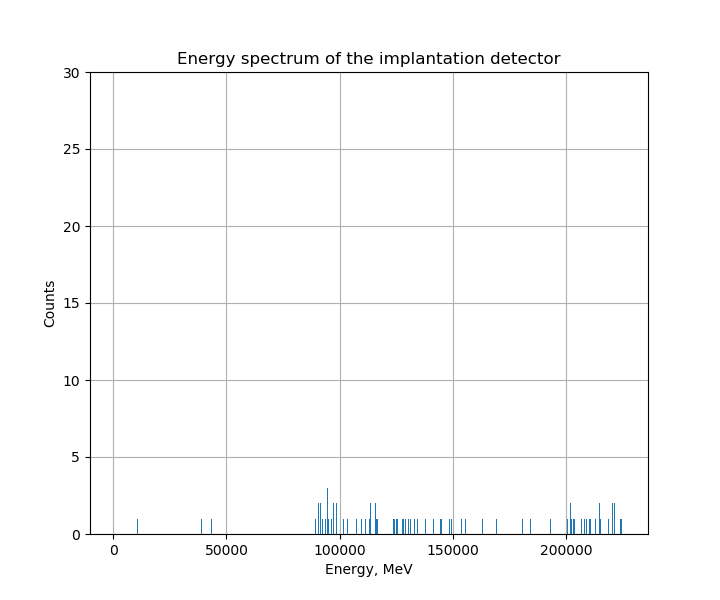

In [13]:
plt.figure(num=None, figsize=(7.2, 6))
ax_imp = E_imp_histo.plot.hist(grid=True,bins=10000)
ax_imp.set(title = 'Energy spectrum of the implantation detector', xlabel = 'Energy, MeV', ylabel = 'Counts')
ax_imp.set_ylim([0,30])
plt.savefig('implant_histogram.eps', format='eps', dpi=300)

## Constructing  a histogram for box detectors <a name="histo_box"></a>

Choose energies detected in the implantation detector

In [14]:
E_box_histo = asymm225.loc[(asymm225['DetID']>1024) & (asymm225['DetID']<2048)].Energy
E_box_histo

TKE    A1    A2   
225.0  76.0  208.0    13003.177303
             208.0    46774.410964
             208.0    73653.494860
             208.0    51774.535583
             208.0    45167.071860
                          ...     
             208.0    42475.820865
             208.0    85216.806722
             208.0    61416.691818
             208.0    67817.177503
             208.0    72562.864414
Name: Energy, Length: 760, dtype: float64

<IPython.core.display.Javascript object>


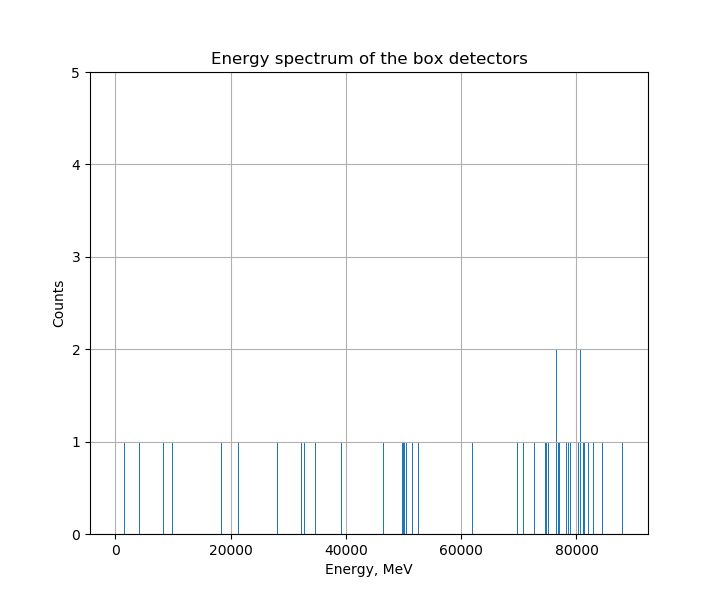

In [15]:
plt.figure(num=None, figsize=(7.2, 6))
ax_box = E_box_histo.plot.hist(grid=True, bins=10000)
ax_box.set(title = 'Energy spectrum of the box detectors', xlabel = 'Energy, MeV', ylabel = 'Counts')
ax_box.set_ylim([0,5])
plt.savefig('box_histogram.eps', format='eps', dpi=300)

## Energy deposited in implantation vs box detectors <a name="imp_box"></a>

Extract energies for the implantation detector and sum them for the same event 

In [16]:
df_imp = asymm225.loc[asymm225['DetID']<1024].groupby(['Event'], sort=False).Energy.sum()
df_imp

Event
0.0       204701.274291
1.0       210576.180404
2.0       203917.364536
3.0       225000.000000
4.0        90427.887638
              ...      
2490.0    204768.379839
2491.0    225000.000000
2492.0    225000.000000
2493.0    111940.697828
2494.0    105365.460921
Name: Energy, Length: 2495, dtype: float64

Extract energies for the box detectors and sum them for the same event 

In [17]:
df_box = (asymm225.loc[(asymm225['DetID']>1024) & (asymm225['DetID']<2048)]).groupby(['Event'], sort=False).Energy.sum()
df_box

Event
6.0       13003.177303
7.0       46774.410964
8.0       73653.494860
10.0      51774.535583
14.0      45167.071860
              ...     
2470.0    42475.820865
2476.0    85216.806722
2479.0    61416.691818
2493.0    67817.177503
2494.0    72562.864414
Name: Energy, Length: 755, dtype: float64

### Events that were registered both at implantation detector and box detectors at the same time  <a name="same"></a>

Join DataFrames for the implantation and box detectors based on the event

In [18]:
df_imp_box = pd.merge(df_box, df_imp, on='Event', suffixes=('_box', '_imp'))
df_imp_box

,Energy_box,Energy_imp
Event,,
6.0,13003.177303,155254.869971
7.0,46774.410964,126074.036881
8.0,73653.494860,102015.976700
10.0,51774.535583,121430.387101
14.0,45167.071860,126172.336153
...,...,...
2470.0,42475.820865,130610.909625
2476.0,85216.806722,94865.035566
2479.0,61416.691818,114149.855479


<IPython.core.display.Javascript object>


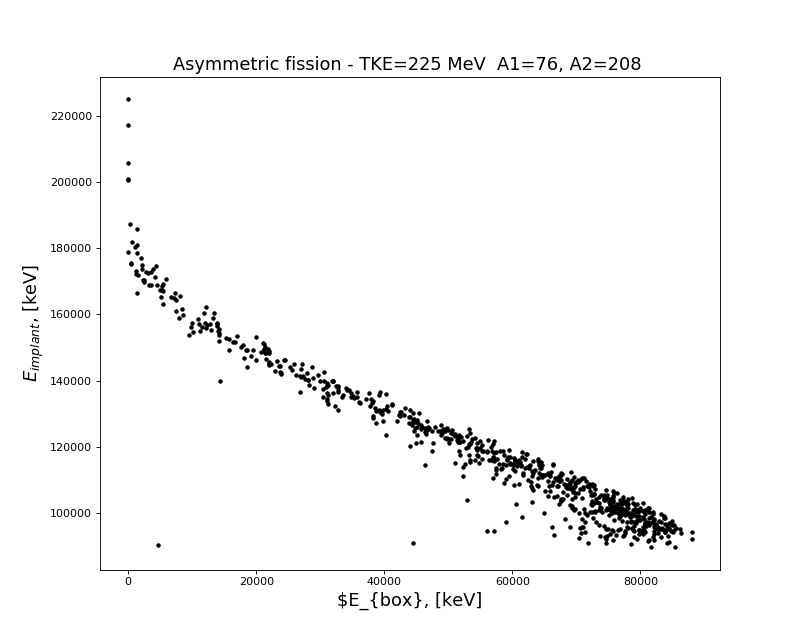

For N=2500 runs


In [19]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot( df_imp_box.Energy_box, df_imp_box.Energy_imp, '.', color='black');
plt.title('Asymmetric fission - TKE=225 MeV  A1=76, A2=208 ', fontsize=16)
plt.xlabel('$E_{box}, [keV]', fontsize=16)
plt.ylabel('$E_{implant}$, [keV]', fontsize=16)
plt.savefig('asymmetric_255_76_208_imp_box.eps', format='eps', dpi=300)
print("For N=2500 runs")

### All events registered at the implantation detector and box detectors <a name="all_events"></a>

In [20]:
df_imp_box_all = pd.merge(df_imp, df_box, on='Event', how='outer', suffixes=('_imp', '_box'))
df_imp_box_all.fillna(0, inplace=True)
df_imp_box_all

,Energy_imp,Energy_box
Event,,
0.0,204701.274291,0.000000
1.0,210576.180404,0.000000
2.0,203917.364536,0.000000
3.0,225000.000000,0.000000
4.0,90427.887638,0.000000
...,...,...
2490.0,204768.379839,0.000000
2491.0,225000.000000,0.000000
2492.0,225000.000000,0.000000


<IPython.core.display.Javascript object>


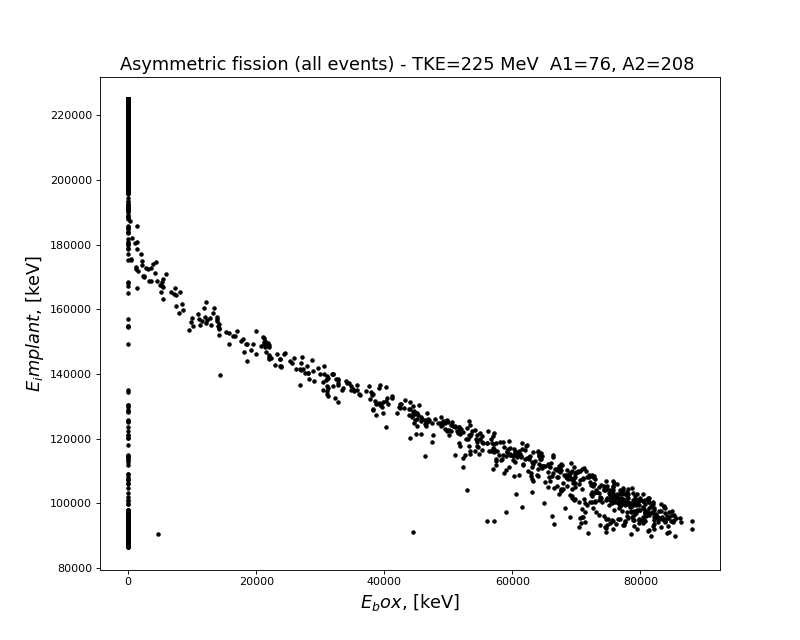

For N=2500 runs


In [21]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot( df_imp_box_all.Energy_box, df_imp_box_all.Energy_imp, '.', color='black');
plt.title('Asymmetric fission (all events) - TKE=225 MeV  A1=76, A2=208 ', fontsize=16)
plt.xlabel('$E_box$, [keV]', fontsize=16)
plt.ylabel('$E_implant$, [keV]', fontsize=16)
plt.savefig('asymmetric_255_76_208_imp_box_all.eps', format='eps', dpi=300)
print("For N=2500 runs")

# Results of all simulations<a name="all_simulations"></a>

Clear plots from previous cells:

Define function `select_implant_box_energy` to help plotting

In [22]:
def select_implant_box_energy(data, TKE, A1, A2):
    df = data.loc[TKE,A1,A2] 
    df_imp = df.loc[df['DetID']<1024].groupby(['Event'], sort=False).Energy.sum()
    df_box = (df.loc[(df['DetID']>1024) & (df['DetID']<2048)]).groupby(['Event'], sort=False).Energy.sum()
    df_final = pd.merge(df_imp, df_box, on='Event', how='outer', suffixes=('_imp', '_box'))
    df_final.fillna(0, inplace=True)
    E_box = df_final.Energy_box/1000
    E_imp = df_final.Energy_imp/1000
    return E_box, E_imp

## Plots of all simulations  <a name="plots_all"></a>

<IPython.core.display.Javascript object>


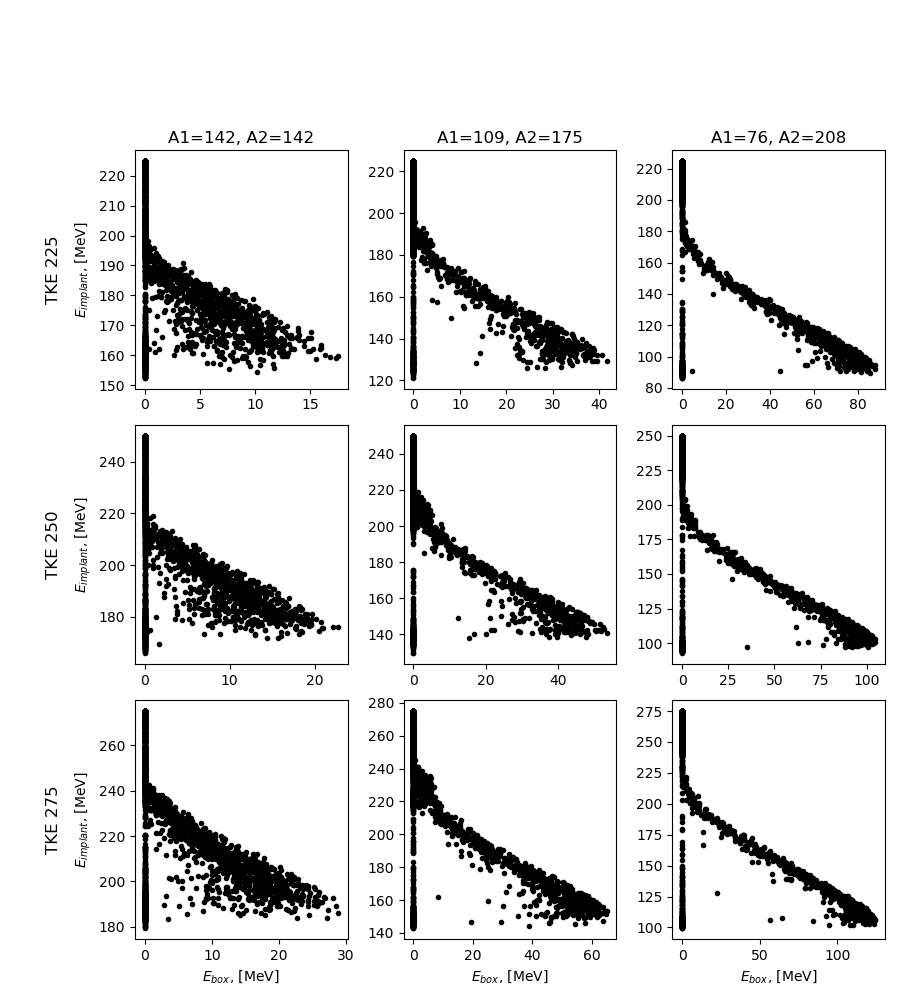

/home/yulia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


In [23]:
fig, axs = plt.subplots(3, 3, figsize=(9,10))

# TKE = 225 MeV 
E_box, E_imp = select_implant_box_energy(data, 225, 142, 142)
axs[0, 0].plot(E_box, E_imp, '.', color='black')
axs[0, 0].set(ylabel="$E_{implant}$, [MeV]")

E_box, E_imp = select_implant_box_energy(data, 225, 109, 175)
axs[0, 1].plot(E_box, E_imp, '.', color='black')

E_box, E_imp = select_implant_box_energy(data, 225, 76, 208)
axs[0, 2].plot(E_box, E_imp, '.', color='black')

# TKE = 250 MeV
E_box, E_imp = select_implant_box_energy(data, 250, 142, 142)
axs[1,0].plot(E_box, E_imp, '.', color='black')
axs[1,0].set(ylabel="$E_{implant}$, [MeV]")

E_box, E_imp = select_implant_box_energy(data, 250, 109, 175)
axs[1,1].plot(E_box, E_imp, '.', color='black')

E_box, E_imp = select_implant_box_energy(data, 250, 76, 208)
axs[1,2].plot(E_box, E_imp, '.', color='black')

# TKE = 275 MeV
E_box, E_imp = select_implant_box_energy(data, 275, 142, 142)
axs[2,0].plot(E_box, E_imp, '.', color='black')
axs[2,0].set(ylabel="$E_{implant}$, [MeV]")
axs[2,0].set(xlabel="$E_{box}$, [MeV]")

E_box, E_imp = select_implant_box_energy(data, 275, 109, 175)
axs[2,1].plot(E_box, E_imp, '.', color='black')
axs[2,1].set(xlabel="$E_{box}$, [MeV]")

E_box, E_imp = select_implant_box_energy(data, 275, 76, 208)
axs[2,2].plot(E_box, E_imp, '.', color='black')
axs[2,2].set(xlabel="$E_{box}$, [MeV]")

cols = ['A1=142, A2=142', 'A1=109, A2=175', 'A1=76, A2=208']
rows = ['TKE {}'.format(row) for row in ['225', '250', '275']]

pad = 5 # in points

for ax, col in zip(axs[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axs[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right',rotation=90, va='center')

fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.85)
fig.savefig('fission_composite_plot.eps', format='eps', dpi=300)
# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='TKE = 225 MeV')

# # Hide  labels and tick labels for top plots and y ticks for right plots.
# for ay in axs.flat:
#     ay.label_outer()

## Plot selected simulation  <a name="plot_selected"></a>

In [24]:
from ipywidgets import interact, interactive, fixed

def plot_cos_decay(TKE, A):
    print(TKE)
    print(A[0])
    print(A[1])
    E_box, E_imp = select_implant_box_energy(data, TKE, A[0], A[1])
    plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.plot( E_box, E_imp, '.', color='black');
    plt.title(' TKE={} MeV  A1={}, A2={} '.format(TKE, A[0], A[1]), fontsize=16)
    plt.xlabel('$E_{box}$, [MeV]', fontsize=16)
    plt.ylabel('$E_{implant}$, [MeV]', fontsize=16)
    fig.savefig('fission_{}_{}_{}.eps'.format(TKE, A[0], A[1]), format='eps', dpi=300)

    
    
interactive_plot = interactive(plot_cos_decay, TKE=[225, 250, 275], A=[('142, 142', [142, 142]), ('109, 175', [109, 175]), ('76, 208', [76, 208])])
interactive_plot.children[0].description=r'$TKE$' # slider
interactive_plot.children[1].description=r'$A$' # slider
interactive_plot

interactive(children=(Dropdown(description='$TKE$', options=(225, 250, 275), value=225), Dropdown(description=…